#### data visualization

this graph helps understand how many images belong to each class in your training dataset. 
It shows if the dataset is balanced or imbalanced 
This is important because imbalanced datasets can lead to biased models that perform poorly on some classes

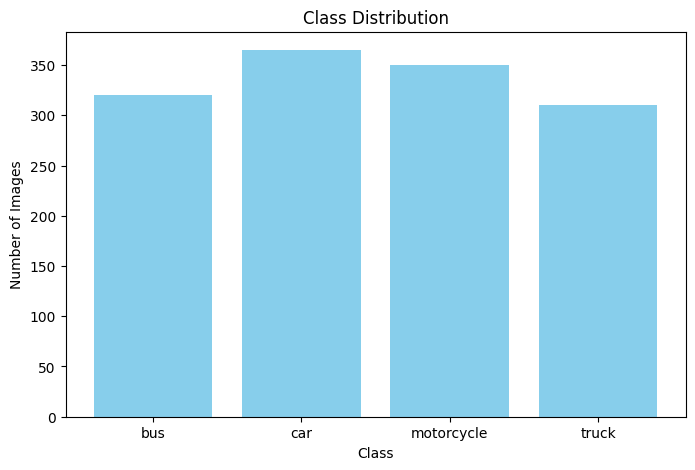

In [5]:
# Visualize Class Distribution
def plot_class_distribution(data_dir):
    classes = os.listdir(data_dir)
    counts = [len(os.listdir(os.path.join(data_dir, cls))) for cls in classes]
    plt.figure(figsize=(8, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.show()

# Example usage:
plot_class_distribution("C:/Users/Administrator/Desktop/newdataset/train")


This graph helps to visually inspect a few sample images from each class in your training dataset. 
It allows you to Verify if class labels are correctly sorted into their respective classes. and mathc with images
basically yo see what we are wroking with 

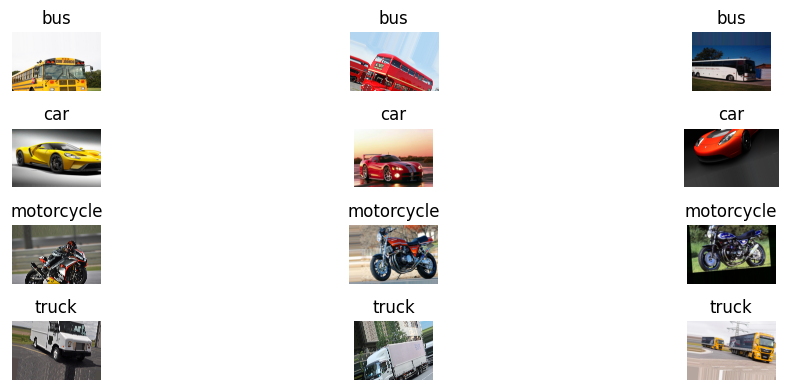

In [8]:

# Visualize Sample Images per Class
def plot_sample_images(data_dir, num_samples=3):
    classes = os.listdir(data_dir)
    plt.figure(figsize=(12, 4))
    for idx, cls in enumerate(classes):
        img_files = os.listdir(os.path.join(data_dir, cls))[:num_samples]
        for i, img_file in enumerate(img_files):
            img_path = os.path.join(data_dir, cls, img_file)
            img = Image.open(img_path)
            plt.subplot(len(classes), num_samples, idx * num_samples + i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_sample_images("C:/Users/Administrator/Desktop/newdataset/train")

the graph below helps you understand the distribution of image sizes (width and height in pixels) in the dataset. 
this is importand because If images have very different sizes, you  need to resize or preprocess them before training the model.

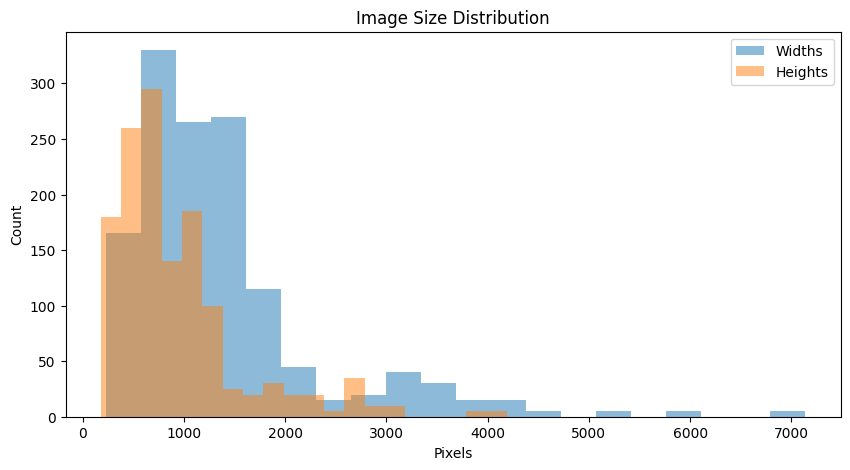

In [9]:
# Visualize Image Size Distribution
def plot_image_size_distribution(data_dir):
    widths, heights = [], []
    for cls in os.listdir(data_dir):
        for img_file in os.listdir(os.path.join(data_dir, cls)):
            img_path = os.path.join(data_dir, cls, img_file)
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=20, alpha=0.5, label='Widths')
    plt.hist(heights, bins=20, alpha=0.5, label='Heights')
    plt.legend()
    plt.title('Image Size Distribution')
    plt.xlabel('Pixels')
    plt.ylabel('Count')
    plt.show()

# Example usage:
plot_image_size_distribution("C:/Users/Administrator/Desktop/newdataset/train")

### importing libraries and modules

In [4]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.preprocessing import aug_set
from src.model import retrain_model
from src.model import cnn_model
from src.prediction import predict_image
from PIL import Image
import matplotlib.pyplot as plt

Class names loaded: ['bus', 'car', 'motorcycle', 'truck']


#### image processing

In [ ]:
# this scripts first checks if the directiry of the insital dataset is correct
# if not it will create a new directory with the augmented images
aug_set("C:/Users/Administrator/Desktop/Projects/traffic-img-classification/dataset", "C:/Users/Administrator/Desktop/newdataset")

#### loading the model

In [5]:
# this script will load the model and train it
# this also prints samples to if normalization and data loading is correct
# the first agrument is the directory of the training dataset, then validation and test dataset
history = cnn_model("C:/Users/Administrator/Desktop/Projects/MLOP-Traffic-Image-Classification/datasetnew/train", "C:/Users/Administrator/Desktop/Projects/MLOP-Traffic-Image-Classification/datasetnew/validate", "C:/Users/Administrator/Desktop/Projects/MLOP-Traffic-Image-Classification/datasetnew/test")

Found 1345 files belonging to 4 classes.
Found 255 files belonging to 4 classes.
Found 250 files belonging to 4 classes.
Epoch 1/5
43/43 - 83s - 2s/step - accuracy: 0.8379 - loss: 0.4690 - val_accuracy: 0.9059 - val_loss: 0.2652
Epoch 2/5
43/43 - 79s - 2s/step - accuracy: 0.9599 - loss: 0.1300 - val_accuracy: 0.9137 - val_loss: 0.2443
Epoch 3/5
43/43 - 59s - 1s/step - accuracy: 0.9836 - loss: 0.0824 - val_accuracy: 0.9137 - val_loss: 0.2434
Epoch 4/5
43/43 - 80s - 2s/step - accuracy: 0.9881 - loss: 0.0623 - val_accuracy: 0.9176 - val_loss: 0.2375
Epoch 5/5
43/43 - 58s - 1s/step - accuracy: 0.9896 - loss: 0.0474 - val_accuracy: 0.9137 - val_loss: 0.2482
8/8 - 12s - 2s/step - accuracy: 0.9320 - loss: 0.2042


Test accuracy: 0.9320
Test loss: 0.2042


#### making predictions

In [12]:
predict_image("C:/Users/Administrator/Desktop/Projects/MLOP-Traffic-Image-Classification/models/image-classes.h5", "C:/Users/Administrator/Desktop/test/Car.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted label: car
Confidence: 0.9633


#### retraining the model

In [6]:
# retrains the model on addictinal data
# retraing data was
history = retrain_model('C:/Users/Administrator/Desktop/Projects/MLOP-Traffic-Image-Classification/retrainingdata')

Found 1428 files belonging to 4 classes.


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9022 - loss: 0.2940
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 933ms/step - accuracy: 0.9409 - loss: 0.1858
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9585 - loss: 0.1467
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 885ms/step - accuracy: 0.9691 - loss: 0.1150
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 898ms/step - accuracy: 0.9740 - loss: 0.0967


Model retrained and saved!
Final training results:
accuracy: 0.9740896224975586
loss: 0.0993330106139183


#### image prediction on retrained model

In [13]:
# makign a prediction on the same test image
# the previous prediction was confident on 0.5154
predict_image("C:/Users/Administrator/Desktop/Projects/MLOP-Traffic-Image-Classification/models/image-classes.h5", "C:/Users/Administrator/Desktop/test/test122.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted label: truck
Confidence: 0.9835
